# Bivariate Normal Distribution

A visual and computational exploration of the **bivariate normal (Gaussian) distribution** — the joint distribution of two correlated normal random variables.

![Bivariate normal density](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/MultivariateNormal.png/400px-MultivariateNormal.png)

*Multivariate normal density (Wikipedia). Our bivariate case is the 2D slice.*

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Shared plot style (DRY)
FIG_SIZE_2D = (10, 8)
FIG_SIZE_3D = (12, 10)
CMAP = 'viridis'

## 1. Parameters & covariance matrix

We define the distribution by a **mean vector** \(\boldsymbol{\mu}\) and **covariance matrix** \(\Sigma\). The correlation \(\rho\) controls the dependence between \(X\) and \(Y\).

In [7]:
def make_bivariate_params(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.6):
    """Build mean vector and covariance matrix from scalar parameters (DRY)."""
    mu = np.array([mu_x, mu_y])
    cov_xy = rho * sigma_x * sigma_y
    Sigma = np.array([
        [sigma_x**2, cov_xy],
        [cov_xy, sigma_y**2]
    ])
    return mu, Sigma, mu_x, mu_y, sigma_x, sigma_y, rho

# Single configuration used everywhere
mu, Sigma, mu_x, mu_y, sigma_x, sigma_y, rho = make_bivariate_params(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.6)

print("Mean vector (μ):", mu)
print("Covariance matrix (Σ):\n", Sigma)

Mean vector (μ): [0 0]
Covariance matrix (Σ):
 [[1.  0.6]
 [0.6 1. ]]


## 2. Simulating data

We draw samples from \(\mathcal{N}(\boldsymbol{\mu}, \Sigma)\) using NumPy's `multivariate_normal`.

In [8]:
def simulate_bivariate_normal(mu, Sigma, n_samples=5000, seed=None):
    """Generate n_samples from N(mu, Sigma)."""
    if seed is not None:
        np.random.seed(seed)
    data = np.random.multivariate_normal(mu, Sigma, n_samples)
    return data[:, 0], data[:, 1]

X_sim, Y_sim = simulate_bivariate_normal(mu, Sigma, n_samples=5000, seed=42)
print(f"Generated {len(X_sim)} samples.")

Generated 5000 samples.


## 3. PDF from scratch

The bivariate normal PDF is:

$$f(x,y) = \frac{1}{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}} \exp\left(-\frac{z}{2(1-\rho^2)}\right)$$

with \(z = \left(\frac{x-\mu_X}{\sigma_X}\right)^2 - 2\rho\frac{x-\mu_X}{\sigma_X}\frac{y-\mu_Y}{\sigma_Y} + \left(\frac{y-\mu_Y}{\sigma_Y}\right)^2\).

In [9]:
def bivariate_normal_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    """Bivariate normal PDF from scratch. Supports scalars and arrays."""
    z_x = (x - mu_x) / sigma_x
    z_y = (y - mu_y) / sigma_y
    exponent = -0.5 / (1 - rho**2) * (z_x**2 - 2*rho*z_x*z_y + z_y**2)
    coef = 1 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))
    return coef * np.exp(exponent)

print("Bivariate normal PDF implemented.")

Bivariate normal PDF implemented.


## 4. Evaluation grid

We evaluate the PDF on a 2D grid for contour and surface plots.

In [10]:
def eval_pdf_on_grid(mu_x, mu_y, sigma_x, sigma_y, rho, x_lim=(-3, 3), y_lim=(-3, 3), n=100):
    """Return X, Y meshgrid and Z = PDF(X,Y). Single place for grid logic (DRY)."""
    x_range = np.linspace(x_lim[0], x_lim[1], n)
    y_range = np.linspace(y_lim[0], y_lim[1], n)
    X, Y = np.meshgrid(x_range, y_range)
    Z = bivariate_normal_pdf(X, Y, mu_x, mu_y, sigma_x, sigma_y, rho)
    return X, Y, Z

X, Y, Z = eval_pdf_on_grid(mu_x, mu_y, sigma_x, sigma_y, rho)
print("Grid and PDF values computed.")

Grid and PDF values computed.


## 5. Visualizations

**Contour plot** and **3D surface** of the density. Below we use the same shared style (figure size, colormap) defined once in the imports cell.

![Correlation and contours](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Correlation_examples2.svg/320px-Correlation_examples2.svg.png)

*How correlation ρ affects the shape of the bivariate normal (Wikipedia).*

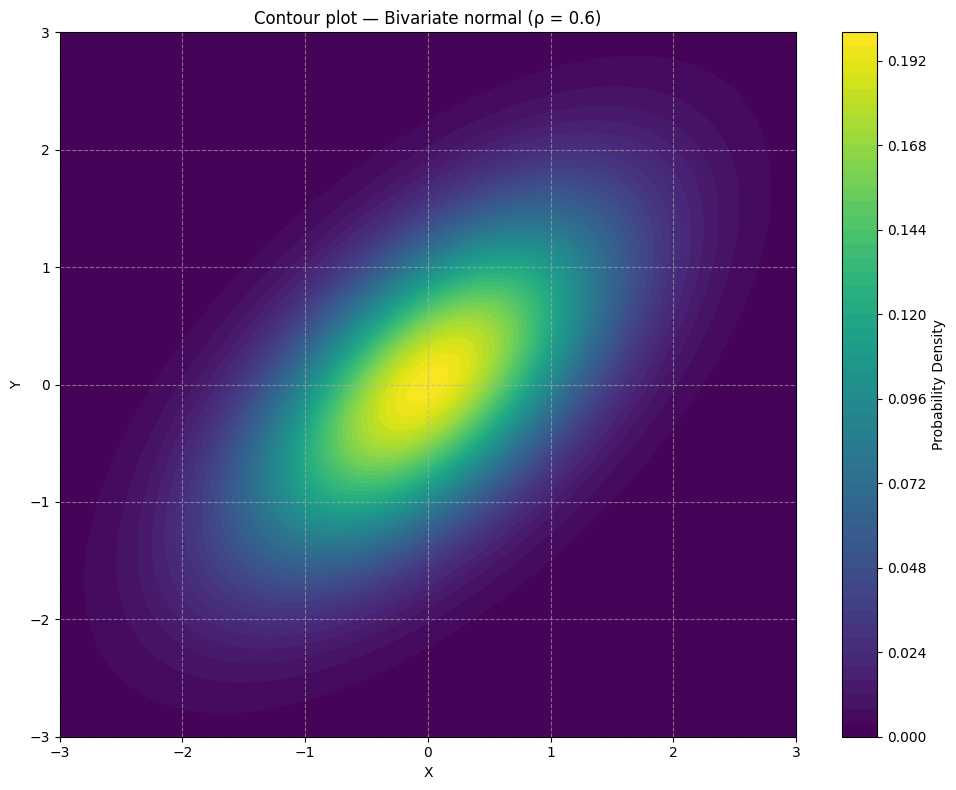

In [11]:
plt.figure(figsize=FIG_SIZE_2D)
plt.contourf(X, Y, Z, levels=50, cmap=CMAP)
plt.colorbar(label='Probability Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Contour plot — Bivariate normal (ρ = {rho})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

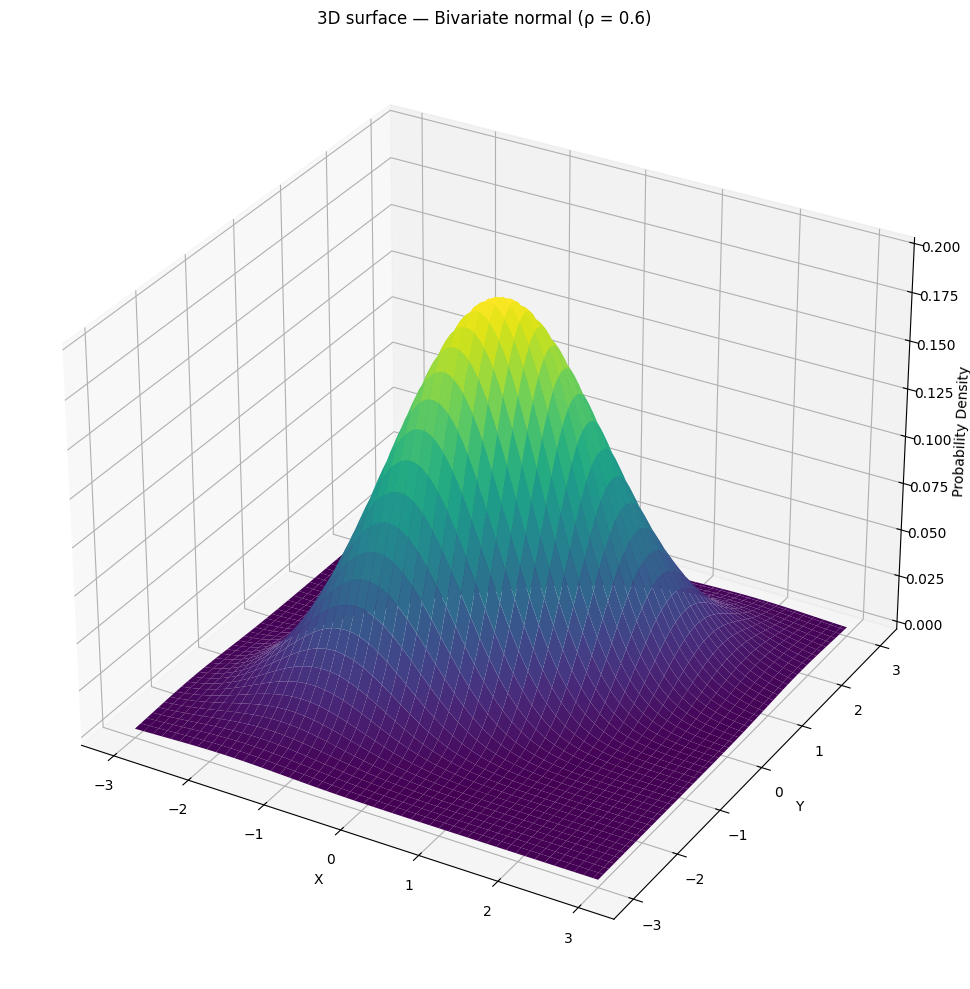

In [12]:
fig = plt.figure(figsize=FIG_SIZE_3D)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=CMAP)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title(f'3D surface — Bivariate normal (ρ = {rho})')
plt.tight_layout()
plt.show()

## 6. Simulated samples on the density

Samples from \(\mathcal{N}(\boldsymbol{\mu}, \Sigma)\) overlaid on the theoretical contour.

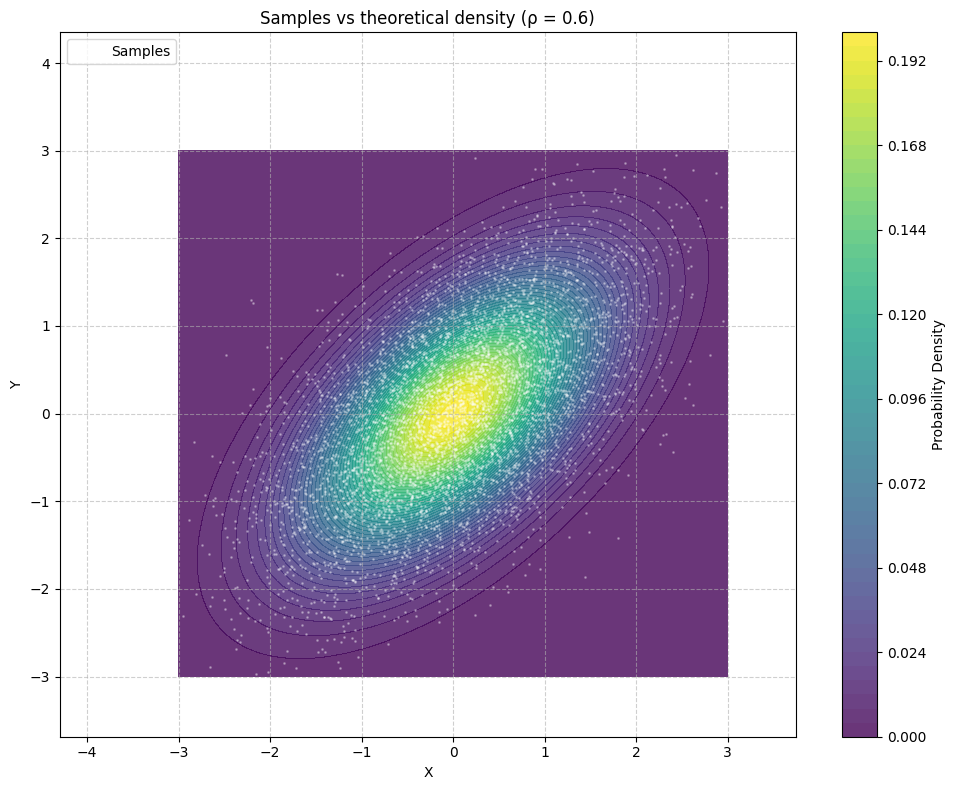

In [13]:
plt.figure(figsize=FIG_SIZE_2D)
plt.contourf(X, Y, Z, levels=50, cmap=CMAP, alpha=0.8)
plt.colorbar(label='Probability Density')
plt.scatter(X_sim, Y_sim, s=1, c='white', alpha=0.3, label='Samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Samples vs theoretical density (ρ = {rho})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()